In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import glob
import os

from scipy.stats import pearsonr, kruskal

Initially processes and analyzes the complete augmented dataset, but use separate arrival-only and augmented-arrival datasets for saving.

In [2]:
# directory containing the monthly CSVs
CSV_DIR = "Datasets/Arrival_With_Weather/2020-2022"

desired_cols = [
    "FL_DATE","AIRLINE","AIRLINE_DOT","AIRLINE_CODE","FL_NUMBER",
    "ORIGIN","ORIGIN_CITY","DEST","DEST_CITY",
    "CRS_DEP_TIME","DEP_TIME","DEP_DELAY",
    "TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN",
    "CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
    "CANCELLED","CANCELLATION_CODE","DIVERTED",
    "CRS_ELAPSED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE",
    "DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT",
    # weather
    "ORIGIN_TEMP","ORIGIN_PRESSURE","ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND","ORIGIN_PRECIP_6HR",
    "DEST_TEMP","DEST_PRESSURE","DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND","DEST_PRECIP_6HR",
]

#rename map: current names to desired names
rename_map = {
    "FlightDate": "FL_DATE",
    "Reporting_Airline": "AIRLINE",
    "DOT_ID_Reporting_Airline": "AIRLINE_DOT",
    "IATA_CODE_Reporting_Airline": "AIRLINE_CODE",
    "Flight_Number_Reporting_Airline": "FL_NUMBER",
    "Origin": "ORIGIN",
    "OriginCityName": "ORIGIN_CITY",
    "Dest": "DEST",
    "DestCityName": "DEST_CITY",
    "CRSDepTime": "CRS_DEP_TIME",
    "DepTime": "DEP_TIME",
    "DepDelay": "DEP_DELAY",
    "TaxiOut": "TAXI_OUT",
    "WheelsOff": "WHEELS_OFF",
    "WheelsOn": "WHEELS_ON",
    "TaxiIn": "TAXI_IN",
    "CRSArrTime": "CRS_ARR_TIME",
    "ArrTime": "ARR_TIME",
    "ArrDelay": "ARR_DELAY",
    "Cancelled": "CANCELLED",
    "CancellationCode": "CANCELLATION_CODE",
    "Diverted": "DIVERTED",
    "CRSElapsedTime": "CRS_ELAPSED_TIME",
    "ActualElapsedTime": "ELAPSED_TIME",
    "AirTime": "AIR_TIME",
    "Distance": "DISTANCE",
    "CarrierDelay": "DELAY_DUE_CARRIER",
    "WeatherDelay": "DELAY_DUE_WEATHER",
    "NASDelay": "DELAY_DUE_NAS",
    "SecurityDelay": "DELAY_DUE_SECURITY",
    "LateAircraftDelay": "DELAY_DUE_LATE_AIRCRAFT",
    "Origin_2m_temperature": "ORIGIN_TEMP",
    "Origin_mean_sea_level_pressure": "ORIGIN_PRESSURE",
    "Origin_10m_u_component_of_wind": "ORIGIN_U_COMP_WIND",
    "Origin_10m_v_component_of_wind": "ORIGIN_V_COMP_WIND",
    "Origin_total_precipitation_6hr": "ORIGIN_PRECIP_6HR",
    "Dest_2m_temperature": "DEST_TEMP",
    "Dest_mean_sea_level_pressure": "DEST_PRESSURE",
    "Dest_10m_u_component_of_wind": "DEST_U_COMP_WIND",
    "Dest_10m_v_component_of_wind": "DEST_V_COMP_WIND",
    "Dest_total_precipitation_6hr": "DEST_PRECIP_6HR"
}

# gather, standardize, and concatenate
all_files = sorted(glob.glob(os.path.join(CSV_DIR, "*.csv")))
standardized_dfs = []

for fp in all_files:
    df = pd.read_csv(fp, low_memory=False)
    df = df.rename(columns=rename_map)
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

    # ensure every desired column exists
    for col in desired_cols:
        if col not in df.columns:
            df[col] = pd.NA
    # select & reorder
    df = df[desired_cols]
    standardized_dfs.append(df)

# final merge
merged = pd.concat(standardized_dfs, ignore_index=True)

# save out the combined dataset
merged.to_csv("Datasets/2020_22_Arrival_Combined.csv", index=False)


Load and view dataset

In [3]:
df_augmented = pd.read_csv("Datasets/2020_22_Arrival_Combined.csv", encoding="utf-8")

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\1697255415.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_augmented = pd.read_csv("Datasets/2020_22_Arrival_Combined.csv", encoding="utf-8")


In [4]:
df = df_augmented

In [5]:

df.shape

(17412876, 41)

In [6]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER',
       'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'ORIGIN_TEMP', 'ORIGIN_PRESSURE', 'ORIGIN_U_COMP_WIND',
       'ORIGIN_V_COMP_WIND', 'ORIGIN_PRECIP_6HR', 'DEST_TEMP', 'DEST_PRESSURE',
       'DEST_U_COMP_WIND', 'DEST_V_COMP_WIND', 'DEST_PRECIP_6HR'],
      dtype='object')

In [7]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
0,2020-01-17,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,297.41843,102555.180,-7.572047,-4.783078,6.001405e-04,264.76760,103905.90,2.523050,-2.797639,-1.862645e-09
1,2020-01-18,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,296.14220,102541.640,-6.024319,3.832024,3.824383e-05,267.59805,101774.24,-1.546868,3.089462,5.056867e-03
2,2020-01-19,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,298.19740,101954.280,1.425548,3.954334,-1.117587e-08,272.92520,101062.31,3.529461,-2.081129,6.651506e-06
3,2020-01-20,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,293.29083,101960.960,1.265657,-6.558300,1.746695e-04,265.67078,102721.19,2.869700,-2.142799,-9.313226e-09
4,2020-01-21,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,290.89350,101853.195,5.317981,-7.284566,3.297813e-05,261.80753,103107.73,2.684846,-1.938694,0.000000e+00


Convert FL_DATE to "datetime" recognized by pandas

In [8]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d').copy()

Toggle assertions on or off

In [9]:
TEST: bool = True

Drop cancelled and diverted flights, they are outside of our scope. we only want delayed flights(keep until finished with visualizations)

Attempt to drop duplicates, we found out there aren't any

In [10]:
df_len_with_duplicates = len(df)
df.drop_duplicates(inplace=True)
if TEST:
  assert len(df) == df_len_with_duplicates  # no duplicates

In [11]:
delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT",
    "ARR_DELAY"
]

def split_by_components(df: pd.DataFrame):
    # cancelled or diverted masks
    cancelled = df["CANCELLED"] == 1
    diverted  = df["DIVERTED"]  == 1

    # has _any_ positive delay component?
    has_delay = df[delay_cols].gt(0).any(axis=1)

    # only keep non‑cancelled & non‑diverted rows
    valid     = ~(cancelled | diverted)

    # slice full-rows (including weather) into two sets
    delay_df    = df.loc[has_delay  & valid].copy()
    no_delay_df = df.loc[~has_delay & valid].copy()
    n_cancel_df   = df.loc[cancelled | diverted].copy()

    return delay_df, no_delay_df, n_cancel_df

# 3) run the split
delay_df, no_delay_df, cancel_df = split_by_components(df)

Visualize presence of delay components

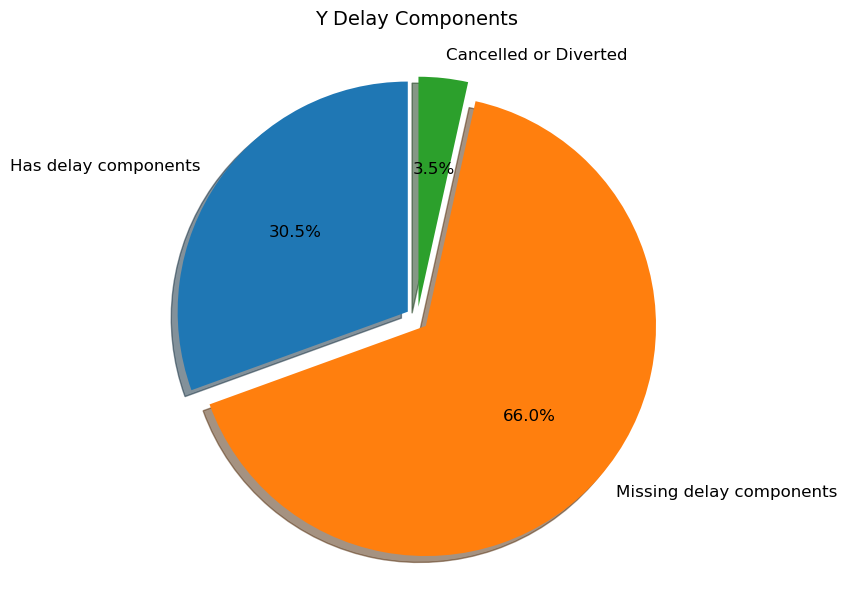

In [12]:
# counts
sizes = [
    len(delay_df),
    len(no_delay_df),
    len(cancel_df)
]
labels = [
    "Has delay components",
    "Missing delay components",
    "Cancelled or Diverted"
]
# optional “explode” to offset each slice slightly
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    textprops={"fontsize": 12}
)
ax.axis("equal")  # keep it as a circle
ax.set_title("Y Delay Components", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

Visualize presence of delay components over each month in the dataset. Blue represents data that we can use.

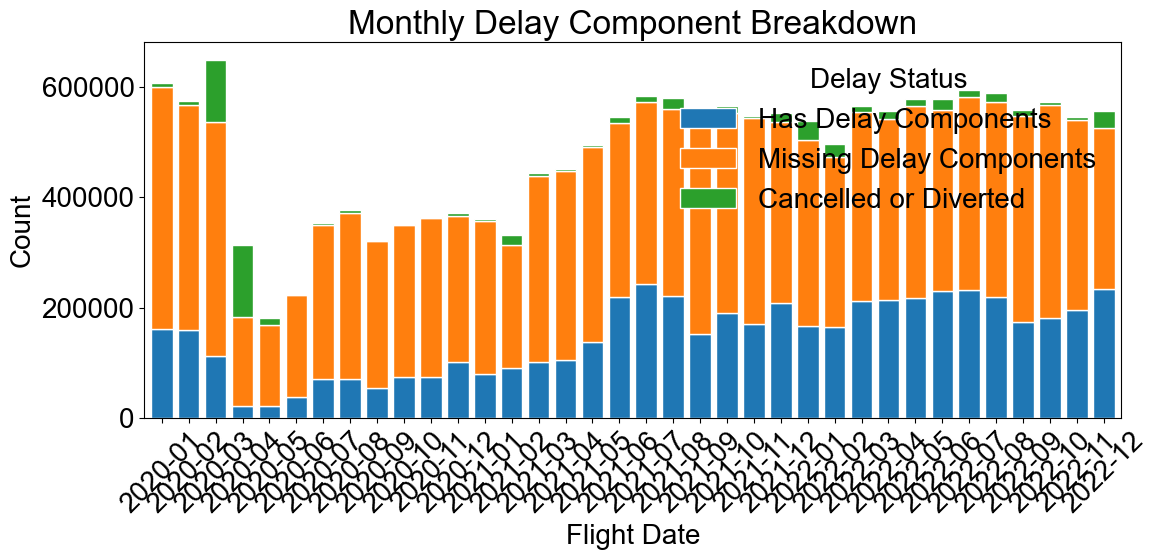

In [13]:


# get Year‑Month counts on each
delay_counts    = delay_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
no_delay_counts = no_delay_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
cancel_counts   = cancel_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()

# combine into one DataFrame
monthly = pd.concat(
    [delay_counts, no_delay_counts, cancel_counts],
    axis=1,
    keys=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
).fillna(0).astype(int)

# reset index to turn Year‑Month into a column
monthly = monthly.reset_index().rename(columns={"index": "FL_DATE"})

# plot as a stacked bar
cols = ["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
df_plot = monthly.set_index("FL_DATE")[cols]

# set a nice global style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 20
})

fig, ax = plt.subplots(figsize=(12, 6))

# plot stacked bars
df_plot.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.8,              # bar width
    edgecolor="white"       # crisp white lines between bars
)

# labels & title
ax.set_xlabel("Flight Date")
ax.set_ylabel("Count")
ax.set_title("Monthly Delay Component Breakdown")

# legend
ax.legend(title="Delay Status", loc="upper right", frameon=False)

# rotate x-labels for readability
ax.tick_params(axis="x", rotation=45)

# tighten up
plt.tight_layout()
plt.show()


In [14]:
# delay component columns
delay_cols = [
    'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT', 'ARR_DELAY'
]


# build a mask of “has any delay component > 0”
mask = df[delay_cols].fillna(0).sum(axis=1) > 0

# slice out those rows and copy to avoid SettingWithCopyWarnings
delay_components_df = df.loc[mask].copy()


no_delay_components_df = df.loc[~mask & (df['CANCELLED']==0) & (df['DIVERTED']==0)].copy()
cancelled_or_diverted_df = df.loc[(df['CANCELLED']==1) | (df['DIVERTED']==1)].copy()


# compute component sums, filling NaN 0
comp_sum = delay_components_df[delay_cols].fillna(0).sum(axis=1)

# compare to ARR_DELAY, also fillna 0
arr_delay = delay_components_df['ARR_DELAY'].fillna(0)
matches  = comp_sum.eq(arr_delay)

# show the offending rows
mismatches = delay_components_df.loc[~matches, delay_cols + ['ARR_DELAY','FL_DATE','AIRLINE']]
print(f"{len(mismatches)} bad row(s):")
print(mismatches)

# to see the difference explicitly
mismatches = mismatches.assign(Difference=comp_sum[~matches] - arr_delay[~matches])
print(mismatches)


2819049 bad row(s):
          DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
14                      2.0                0.0            0.0   
23                      0.0                0.0           26.0   
44                     54.0                0.0            0.0   
79                      0.0                0.0           56.0   
85                     31.0                0.0            0.0   
...                     ...                ...            ...   
17412849                0.0                0.0           36.0   
17412862               31.0                0.0            0.0   
17412869               39.0                0.0            1.0   
17412870               38.0                0.0            0.0   
17412871               42.0                0.0            0.0   

          DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  ARR_DELAY  ARR_DELAY  \
14                       0.0                     20.0       22.0       22.0   
23                       0.0             

Set data to just the delay components to simplify referencing below

In [15]:
data = delay_components_df.copy()

Remove outliers using IQR method on the overall arrival delay

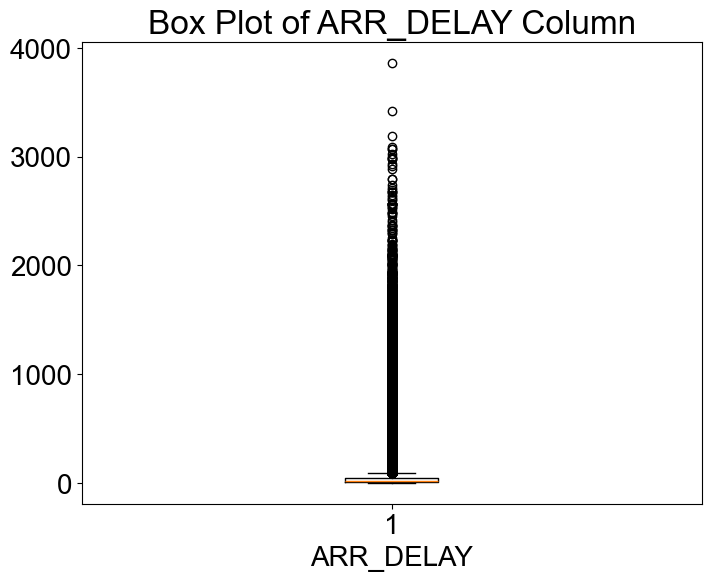

Summary Statistics after Removing Outliers:
count    4.806234e+06
mean     2.147162e+01
std      2.134714e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      3.000000e+01
max      9.300000e+01
Name: ARR_DELAY, dtype: float64
count    5.317825e+06
mean     3.798146e+01
std      7.469167e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.600000e+01
75%      4.100000e+01
max      3.864000e+03
Name: ARR_DELAY, dtype: float64
0.09620305293987673
511591


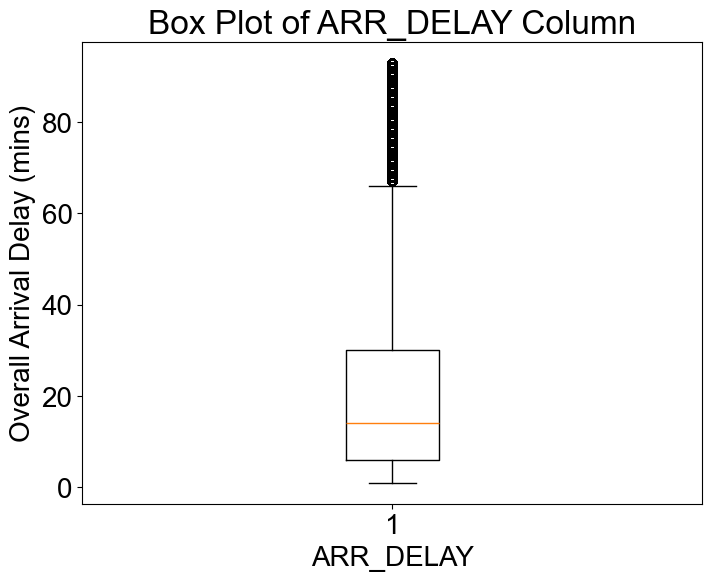

In [16]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.show()

# Calculate Q1, Q3, IQR
Q1 = data['ARR_DELAY'].quantile(0.25)
Q3 = data['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['ARR_DELAY'] >= lower_bound) & (data['ARR_DELAY'] <= upper_bound)]

cat_cols = ['AIRLINE', 'FL_DATE']

non_cat_cols = ["CRS_DEP_TIME", "TAXI_OUT", "TAXI_IN",
    "CRS_ARR_TIME", "CRS_ELAPSED_TIME",
    "DISTANCE", "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
    "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND", "DEST_PRECIP_6HR",
]
X_cols = []
y_cols = []


print("Summary Statistics after Removing Outliers:")
print(data_no_outliers['ARR_DELAY'].describe())
print(data["ARR_DELAY"].describe())

print((len(data) - len(data_no_outliers)) / len(data))
print((len(data) - len(data_no_outliers)))

# Box plot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.ylabel("Overall Arrival Delay (mins)")
plt.show()


Calculate Pearson Correlation on just the non-categorical attributes, since Pearson Correlation is invalid for categorical attributes

In [17]:
def calculate_pearson_score(df: pd.DataFrame, col: str, y) -> float:
  try:
    corr,_ = pearsonr(df[col].values, y.values)
    return corr
  except:
    return 0

# Calculate the Pearson correlation coefficient for each column w/ ARR_DELAY
pearson_scores = {}
cols=['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE',"ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
      "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
      "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
      "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]

for col in cols:
    pearson_scores[col] = calculate_pearson_score(data_no_outliers, col, data_no_outliers["ARR_DELAY"])

# Sort the Pearson correlation coefficients
sorted_pearson_scores = sorted(pearson_scores.items(), key=lambda x: x[1], reverse=True)

for col, score in sorted_pearson_scores:
    print(f"{col}: {score}")


CRS_DEP_TIME: 0.12948765952826596
CRS_ARR_TIME: 0.09838148037358754
TAXI_OUT: 0.09654845591477808
DEST_TEMP: 0.05279024061019698
ORIGIN_PRECIP_6HR: 0.05139988285159767
ORIGIN_TEMP: 0.047782210615496645
TAXI_IN: 0.04413128046398908
DEST_PRECIP_6HR: 0.04210691087015872
ORIGIN_V_COMP_WIND: 0.024140506325391536
DEST_V_COMP_WIND: 0.01782891404297516
ORIGIN_U_COMP_WIND: 0.016276126679831162
DEST_U_COMP_WIND: 0.016031088003261237
CRS_ELAPSED_TIME: 0.009752976663705249
DISTANCE: 0.0011983549690621493
ORIGIN_PRESSURE: -0.045936493834761186
DEST_PRESSURE: -0.048140532254122924


Calculate Kruskal-Wallis H-test to sort categorical attributes and prove redundancy for some attributes

In [18]:


cols = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE',
        'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']

# Calculate the Kruskal-Wallis H statistic for each categorical variable
h_values = {}
for col in cols:
    h, p_value = kruskal(*[group['ARR_DELAY'] for name, group in data_no_outliers.groupby(col)])
    h_values[col] = h

# Sort the columns by their H values
sorted_cols = sorted(h_values, key=h_values.get, reverse=True)

print("Categorical columns ranked by their correlation with:")
for col in sorted_cols:
    print(f"{col}: {h_values[col]}")

Categorical columns ranked by their correlation with:
FL_DATE: 154752.06978343162
AIRLINE_DOT: 43180.42240397472
AIRLINE: 43180.42240397286
AIRLINE_CODE: 43180.42240397286
ORIGIN: 42943.62563421028
ORIGIN_CITY: 42533.69770621237
DEST: 32161.35696438093
FL_NUMBER: 31365.01119778917
DEST_CITY: 31047.170026934673


In [19]:
X_aug_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd
        "FL_NUMBER",
        "AIRLINE",  
        "ORIGIN",
        "DEST",
        "CRS_DEP_TIME",
        "CRS_ARR_TIME",  
        "DISTANCE",
        "TAXI_IN",
        "TAXI_OUT",
        "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",  #weather observations
        "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
        "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
        "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"
    ]
]

X_df = data_no_outliers[
    [
        "FL_DATE", 
        "FL_NUMBER",
        "AIRLINE",  
        "ORIGIN", 
        "DEST",
        "CRS_DEP_TIME",
        "CRS_ARR_TIME",
        "DISTANCE",
        "TAXI_IN",
        "TAXI_OUT"
    ]
]

Y_df = data_no_outliers[
    [
        "DELAY_DUE_CARRIER",
        "DELAY_DUE_WEATHER",
        "DELAY_DUE_SECURITY",
        "DELAY_DUE_NAS", 
        "DELAY_DUE_LATE_AIRCRAFT",
        "ARR_DELAY"
        
    ]
]

arr_only_y_df = data_no_outliers[["ARR_DELAY"]]


# AIRLINE_CODE, DOT_CODE, FL_NUMBER are ignored because they are unique identifiers
# TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN are ignored
# DEP_TIME, DEP_DELAY, ARR_TIME, ELAPSED_TIME are ignored



Check if there are any NA values in X_df. There are none

In [20]:
# Look for any NA values in X_aug
if TEST:
  X_aug_df.replace('', np.nan, inplace=True)
  pd.isna(X_aug_df).sum().sum() == 0

# Look for any NA values in X
if TEST:
  X_df.replace('', np.nan, inplace=True)
  pd.isna(X_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2171885637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df.replace('', np.nan, inplace=True)
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2171885637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df.replace('', np.nan, inplace=True)


Label encode airline and airport. ORIGIN and DEST should be encoded together to preserve the relationship between outbound and inbound same airports.

In [21]:
# Assign integer labels to airline
airline_encoder_aug = LabelEncoder()
X_aug_df["AIRLINE"] = airline_encoder_aug.fit_transform(X_aug_df["AIRLINE"])

# Assign integer labels to airport code
airport_aug_encoder = LabelEncoder()
airport_aug_encoder.fit(pd.concat([X_aug_df["ORIGIN"],X_aug_df["DEST"]], axis=0))
X_aug_df["ORIGIN"] = airport_aug_encoder.transform(X_aug_df["ORIGIN"])
X_aug_df["DEST"] = airport_aug_encoder.transform(X_aug_df["DEST"])

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2776001691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["AIRLINE"] = airline_encoder_aug.fit_transform(X_aug_df["AIRLINE"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2776001691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["ORIGIN"] = airport_aug_encoder.transform(X_aug_df["ORIGIN"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2776001691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
3,2020-01-20,942,3,268,30,1940,2229,1133.0,13.0,27.0,293.29083,101960.960,1.265657,-6.558300,0.000175,265.67078,102721.190,2.869700,-2.142799,-9.313226e-09
4,2020-01-21,942,3,268,30,1940,2229,1133.0,6.0,10.0,290.89350,101853.195,5.317981,-7.284566,0.000033,261.80753,103107.730,2.684846,-1.938694,0.000000e+00
14,2020-01-31,942,3,268,30,1940,2229,1133.0,4.0,11.0,296.87415,101568.350,-1.342188,4.131715,0.000098,273.95145,102406.110,1.161489,1.634387,0.000000e+00
17,2020-01-12,945,3,48,76,900,1135,728.0,24.0,13.0,288.58624,101368.195,5.085212,7.757883,0.000000,288.63943,102254.984,2.609500,2.675831,5.711913e-04
21,2020-01-16,945,3,48,76,900,1135,728.0,7.0,19.0,274.00082,101701.414,0.782676,0.094088,0.000000,290.18945,101938.590,2.346788,0.220142,4.254282e-06


In [22]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])

# Assign integer labels to airport code
airport_encoder = LabelEncoder()
airport_encoder.fit(pd.concat([X_df["ORIGIN"],X_df["DEST"]], axis=0))
X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
X_df["DEST"] = airport_encoder.transform(X_df["DEST"])

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3194656262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3194656262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3194656262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
3,2020-01-20,942,3,268,30,1940,2229,1133.0,13.0,27.0
4,2020-01-21,942,3,268,30,1940,2229,1133.0,6.0,10.0
14,2020-01-31,942,3,268,30,1940,2229,1133.0,4.0,11.0
17,2020-01-12,945,3,48,76,900,1135,728.0,24.0,13.0
21,2020-01-16,945,3,48,76,900,1135,728.0,7.0,19.0


Show number of unique airports

In [23]:
print(f"Number of airports in data: {max([max(X_df['ORIGIN']), max(X_df['DEST'])]) + 1}")

Number of airports in data: 378


In [24]:
print(f"Number of airports in augmented data: {max([max(X_aug_df['ORIGIN']), max(X_aug_df['DEST'])]) + 1}")

Number of airports in augmented data: 378


Convert hhmm time format to minutes past midnight

In [25]:
def convert_hhmm_to_mins(hhmm_list):
  hours = []
  mins = []

  # Look at str length to determine number of hours and mins
  for s in hhmm_list:
    if len(s) == 1:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 2:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 3:
      hours.append(int(s[0]))
      mins.append(int(s[1:]))
    elif len(s) == 4:
        hours.append(int(s[:2]))
        mins.append(int(s[2:]))
    else:
      raise ValueError(s)

  # Calculate total minutes
  return np.array(hours) * 60 + np.array(mins)

# Convert hhmm times to minutes
X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])

X_df["CRS_ARR_TIME"] = X_df["CRS_ARR_TIME"].astype(str)
X_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_df["CRS_ARR_TIME"])

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\566707930.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\566707930.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\566707930.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
3,2020-01-20,942,3,268,30,1180,1349,1133.0,13.0,27.0
4,2020-01-21,942,3,268,30,1180,1349,1133.0,6.0,10.0
14,2020-01-31,942,3,268,30,1180,1349,1133.0,4.0,11.0
17,2020-01-12,945,3,48,76,540,695,728.0,24.0,13.0
21,2020-01-16,945,3,48,76,540,695,728.0,7.0,19.0


In [26]:
# Convert hhmm times to minutes
X_aug_df["CRS_DEP_TIME"] = X_aug_df["CRS_DEP_TIME"].astype(str)
X_aug_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_DEP_TIME"])

X_aug_df["CRS_ARR_TIME"] = X_aug_df["CRS_ARR_TIME"].astype(str)
X_aug_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_ARR_TIME"])

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2685711273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["CRS_DEP_TIME"] = X_aug_df["CRS_DEP_TIME"].astype(str)
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2685711273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_DEP_TIME"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2685711273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
3,2020-01-20,942,3,268,30,1180,1349,1133.0,13.0,27.0,293.29083,101960.960,1.265657,-6.558300,0.000175,265.67078,102721.190,2.869700,-2.142799,-9.313226e-09
4,2020-01-21,942,3,268,30,1180,1349,1133.0,6.0,10.0,290.89350,101853.195,5.317981,-7.284566,0.000033,261.80753,103107.730,2.684846,-1.938694,0.000000e+00
14,2020-01-31,942,3,268,30,1180,1349,1133.0,4.0,11.0,296.87415,101568.350,-1.342188,4.131715,0.000098,273.95145,102406.110,1.161489,1.634387,0.000000e+00
17,2020-01-12,945,3,48,76,540,695,728.0,24.0,13.0,288.58624,101368.195,5.085212,7.757883,0.000000,288.63943,102254.984,2.609500,2.675831,5.711913e-04
21,2020-01-16,945,3,48,76,540,695,728.0,7.0,19.0,274.00082,101701.414,0.782676,0.094088,0.000000,290.18945,101938.590,2.346788,0.220142,4.254282e-06


Convert distance to an integer in case it is not. Data is recorded as discrete integer values.

In [27]:
# Convert distance to int, its already an int basically
X_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2097329403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["DISTANCE"] = df["DISTANCE"].astype(int)


,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
3,2020-01-20,942,3,268,30,1180,1349,1133,13.0,27.0
4,2020-01-21,942,3,268,30,1180,1349,1133,6.0,10.0
14,2020-01-31,942,3,268,30,1180,1349,1133,4.0,11.0
17,2020-01-12,945,3,48,76,540,695,728,24.0,13.0
21,2020-01-16,945,3,48,76,540,695,728,7.0,19.0


In [28]:
# Convert distance to int, its already an int basically
X_aug_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2960313901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["DISTANCE"] = df["DISTANCE"].astype(int)


,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
3,2020-01-20,942,3,268,30,1180,1349,1133,13.0,27.0,293.29083,101960.960,1.265657,-6.558300,0.000175,265.67078,102721.190,2.869700,-2.142799,-9.313226e-09
4,2020-01-21,942,3,268,30,1180,1349,1133,6.0,10.0,290.89350,101853.195,5.317981,-7.284566,0.000033,261.80753,103107.730,2.684846,-1.938694,0.000000e+00
14,2020-01-31,942,3,268,30,1180,1349,1133,4.0,11.0,296.87415,101568.350,-1.342188,4.131715,0.000098,273.95145,102406.110,1.161489,1.634387,0.000000e+00
17,2020-01-12,945,3,48,76,540,695,728,24.0,13.0,288.58624,101368.195,5.085212,7.757883,0.000000,288.63943,102254.984,2.609500,2.675831,5.711913e-04
21,2020-01-16,945,3,48,76,540,695,728,7.0,19.0,274.00082,101701.414,0.782676,0.094088,0.000000,290.18945,101938.590,2.346788,0.220142,4.254282e-06


Break datetime into separate YEAR, MONTH, DAY attributes

In [29]:
# Convert FL_DATE column to datetime
X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])

X_df['YEAR'] = X_df['FL_DATE'].dt.year
X_df['MONTH'] = X_df['FL_DATE'].dt.month
X_df['DAY'] = X_df['FL_DATE'].dt.day

# Drop the original column
X_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_df["MONTH"].min() == 1
    assert X_df["MONTH"].max() == 12
    assert X_df["DAY"].min() == 1
    assert X_df["DAY"].max() == 31

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2737446006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2737446006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['YEAR'] = X_df['FL_DATE'].dt.year
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2737446006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR,MONTH,DAY
3,942,3,268,30,1180,1349,1133,13.0,27.0,2020,1,20
4,942,3,268,30,1180,1349,1133,6.0,10.0,2020,1,21
14,942,3,268,30,1180,1349,1133,4.0,11.0,2020,1,31
17,945,3,48,76,540,695,728,24.0,13.0,2020,1,12
21,945,3,48,76,540,695,728,7.0,19.0,2020,1,16


In [30]:
# Convert FL_DATE column to datetime
X_aug_df['FL_DATE'] = pd.to_datetime(X_aug_df['FL_DATE'])

X_aug_df['YEAR'] = X_aug_df['FL_DATE'].dt.year
X_aug_df['MONTH'] = X_aug_df['FL_DATE'].dt.month
X_aug_df['DAY'] = X_aug_df['FL_DATE'].dt.day

# Drop the original column
X_aug_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_aug_df["MONTH"].min() == 1
    assert X_aug_df["MONTH"].max() == 12
    assert X_aug_df["DAY"].min() == 1
    assert X_aug_df["DAY"].max() == 31

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3461875912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df['FL_DATE'] = pd.to_datetime(X_aug_df['FL_DATE'])
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3461875912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df['YEAR'] = X_aug_df['FL_DATE'].dt.year
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3461875912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
3,942,3,268,30,1180,1349,1133,13.0,27.0,293.29083,...,-6.558300,0.000175,265.67078,102721.190,2.869700,-2.142799,-9.313226e-09,2020,1,20
4,942,3,268,30,1180,1349,1133,6.0,10.0,290.89350,...,-7.284566,0.000033,261.80753,103107.730,2.684846,-1.938694,0.000000e+00,2020,1,21
14,942,3,268,30,1180,1349,1133,4.0,11.0,296.87415,...,4.131715,0.000098,273.95145,102406.110,1.161489,1.634387,0.000000e+00,2020,1,31
17,945,3,48,76,540,695,728,24.0,13.0,288.58624,...,7.757883,0.000000,288.63943,102254.984,2.609500,2.675831,5.711913e-04,2020,1,12
21,945,3,48,76,540,695,728,7.0,19.0,274.00082,...,0.094088,0.000000,290.18945,101938.590,2.346788,0.220142,4.254282e-06,2020,1,16


In [31]:
X_df.drop(columns=["FL_NUMBER"], inplace=True)
X_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3038037169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df.drop(columns=["FL_NUMBER"], inplace=True)


,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR,MONTH,DAY
3,3,268,30,1180,1349,1133,13.0,27.0,2020,1,20
4,3,268,30,1180,1349,1133,6.0,10.0,2020,1,21
14,3,268,30,1180,1349,1133,4.0,11.0,2020,1,31
17,3,48,76,540,695,728,24.0,13.0,2020,1,12
21,3,48,76,540,695,728,7.0,19.0,2020,1,16
...,...,...,...,...,...,...,...,...,...,...,...
17412869,4,22,107,1085,1203,594,10.0,11.0,2022,9,20
17412870,4,22,107,1085,1203,594,9.0,9.0,2022,9,21
17412871,4,22,107,1085,1203,594,7.0,13.0,2022,9,22
17412873,4,22,107,1085,1204,594,7.0,16.0,2022,9,24


In [32]:
X_aug_df.drop(columns=["FL_NUMBER"], inplace=True)
X_aug_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\2925160538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df.drop(columns=["FL_NUMBER"], inplace=True)


,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
3,3,268,30,1180,1349,1133,13.0,27.0,293.29083,101960.960,...,-6.558300,0.000175,265.67078,102721.190,2.869700,-2.142799,-9.313226e-09,2020,1,20
4,3,268,30,1180,1349,1133,6.0,10.0,290.89350,101853.195,...,-7.284566,0.000033,261.80753,103107.730,2.684846,-1.938694,0.000000e+00,2020,1,21
14,3,268,30,1180,1349,1133,4.0,11.0,296.87415,101568.350,...,4.131715,0.000098,273.95145,102406.110,1.161489,1.634387,0.000000e+00,2020,1,31
17,3,48,76,540,695,728,24.0,13.0,288.58624,101368.195,...,7.757883,0.000000,288.63943,102254.984,2.609500,2.675831,5.711913e-04,2020,1,12
21,3,48,76,540,695,728,7.0,19.0,274.00082,101701.414,...,0.094088,0.000000,290.18945,101938.590,2.346788,0.220142,4.254282e-06,2020,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412869,4,22,107,1085,1203,594,10.0,11.0,303.70618,101561.020,...,-2.885752,0.000415,298.45764,101664.540,1.129968,1.747070,0.000000e+00,2022,9,20
17412870,4,22,107,1085,1203,594,9.0,9.0,304.63740,101493.380,...,-0.380128,0.000000,298.69635,100717.110,6.656410,-0.178457,1.775483e-03,2022,9,21
17412871,4,22,107,1085,1203,594,7.0,13.0,306.83386,101132.664,...,-3.265945,0.000013,290.12708,101616.830,3.793320,-7.236470,2.849847e-06,2022,9,22
17412873,4,22,107,1085,1204,594,7.0,16.0,298.34772,101890.086,...,0.906663,0.000000,289.76530,101378.830,0.064698,3.253411,8.854168e-04,2022,9,24


Taxi in and taxi out to int

In [33]:
X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3527431485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\3527431485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)


In [34]:
X_aug_df["TAXI_IN"] = X_aug_df["TAXI_IN"].astype(int)
X_aug_df["TAXI_OUT"] = X_aug_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\139675181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["TAXI_IN"] = X_aug_df["TAXI_IN"].astype(int)
C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\139675181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["TAXI_OUT"] = X_aug_df["TAXI_OUT"].astype(int)


Look for any NA values in Y. We found that there are not any

In [35]:
# Look for any NA values in Y
if TEST:
  Y_df.replace('', np.nan, inplace=True)
  pd.isna(Y_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_11512\1446585502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_df.replace('', np.nan, inplace=True)


Convert Y to int (all values are already integers in the data). Ensure length matches length of X_df.

In [36]:
arr_only_y_df = arr_only_y_df.astype(int)

Split into train and test using 75/25 split and random_state

In [37]:
X_train_aug, X_test_aug, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_aug_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

In [38]:
X_train, X_test, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

Scale numeric columns using Z-normalization. Fit to X_train, apply to X_test to prevent data leakage.

In [39]:
numeric_columns_aug = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT","ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR","DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND","DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale_aug = pd.DataFrame(scaler.fit_transform(X_train_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_train_aug.index)
X_test_scale_aug = pd.DataFrame(scaler.transform(X_test_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_test_aug.index)

X_train_scale_aug = pd.concat([X_train_aug[categorical_columns], X_train_scale_aug], axis=1)
X_test_scale_aug = pd.concat([X_test_aug[categorical_columns], X_test_scale_aug], axis=1)

X_train_scale_aug.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
3507469,7,275,28,2020,6,21,1.632549,1.421095,0.794174,-0.231317,...,0.951302,-1.018354,-0.036350,0.400790,0.587410,2.218997,-1.559851,0.646955,-0.096598,-0.300314
3694463,9,76,78,2020,7,22,0.884809,0.667786,-0.543867,-0.109980,...,1.571259,0.350413,0.686908,0.532991,-0.281334,1.032794,-0.158027,1.017424,0.474995,-0.102714
4228732,12,359,333,2020,8,29,-1.485387,-1.120503,-0.410062,3.651471,...,1.413457,-1.004463,0.049610,0.653260,-0.134570,0.408586,-1.034826,-1.082831,0.296611,-0.299045
9376428,16,341,171,2021,7,12,-0.049867,0.101167,0.009981,0.132694,...,0.891324,0.576212,-0.885723,-0.045772,-0.284271,1.625388,0.255313,-0.325629,0.727429,-0.248298
6335187,4,48,333,2021,12,10,0.761361,1.109946,2.137296,0.011357,...,-1.054787,0.764475,-0.579548,0.846309,-0.285940,-1.819904,1.495498,0.382745,0.160501,-0.112231


In [40]:
X_train_scale_aug.to_csv("data/X_train_label.csv", index=False)
X_test_scale_aug.to_csv("data/X_test_label.csv", index=False)

In [41]:
Y_train.to_csv("data/Y_train.csv", index=False)
Y_test.to_csv("data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/arr_delay_only_y_test.csv", index=False)

In [42]:
numeric_columns = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

X_train_scale = pd.concat([X_train[categorical_columns], X_train_scale], axis=1)
X_test_scale = pd.concat([X_test[categorical_columns], X_test_scale], axis=1)

X_train_scale.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
3507469,7,275,28,2020,6,21,1.632549,1.421095,0.794174,-0.231317,-0.740427
3694463,9,76,78,2020,7,22,0.884809,0.667786,-0.543867,-0.109980,1.941898
4228732,12,359,333,2020,8,29,-1.485387,-1.120503,-0.410062,3.651471,-0.913480
9376428,16,341,171,2021,7,12,-0.049867,0.101167,0.009981,0.132694,-0.307794
6335187,4,48,333,2021,12,10,0.761361,1.109946,2.137296,0.011357,-0.048214


Save label-encoded X data to CSV

In [43]:
X_train_scale.to_csv("data/old_data/X_train_label.csv", index=False)
X_test_scale.to_csv("data/old_data/X_test_label.csv", index=False)

Save Y data to CSV

In [44]:
Y_train.to_csv("data/old_data/Y_train.csv", index=False)
Y_test.to_csv("data/old_data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/old_data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/old_data/arr_delay_only_y_test.csv", index=False)